In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
delays_df = pd.read_csv('csvData/Lots_of_flight_data.csv')
delays_df.shape
delays_df.dropna(inplace=True)

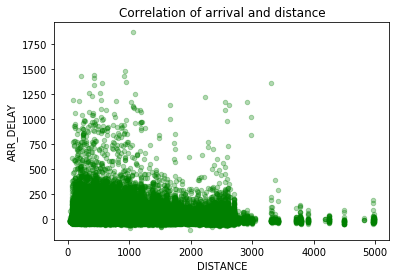

In [25]:
delays_df.plot(
              kind='scatter',
              x='DISTANCE',
              y='ARR_DELAY',
              color='green',
              alpha=0.3,
              title='Correlation of arrival and distance'
              )
plt.show() # No Correlation!

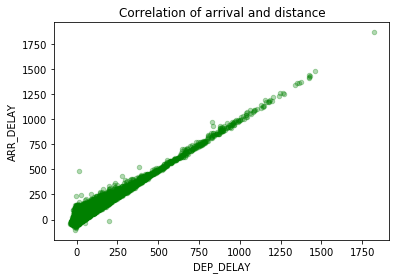

In [28]:
delays_df.plot(
              kind='scatter',
              x='DEP_DELAY',
              y='ARR_DELAY',
              color='green',
              alpha=0.3,
              title='Correlation of arrival and distance'
              )
plt.show() # No Correlation!

In [26]:
X = delays_df.loc[:,['DISTANCE', 'CRS_ELAPSED_TIME']]
X.tail

<bound method NDFrame.tail of         DISTANCE  CRS_ELAPSED_TIME
0           1670               225
1           1670               225
2            580               105
3            580               105
4            580               100
...          ...               ...
299995       386                87
299996       386                92
299997       221                71
299998       221                81
299999       240                66

[295832 rows x 2 columns]>

In [27]:
Y = delays_df.loc[:, ['ARR_DELAY']]
# Y.head()
Y.tail

<bound method NDFrame.tail of         ARR_DELAY
0           -17.0
1           -25.0
2           -13.0
3           -12.0
4            -7.0
...           ...
299995       -7.0
299996      -13.0
299997       -2.0
299998      -13.0
299999        6.0

[295832 rows x 1 columns]>

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=42
                                                    )

In [6]:
X_train.shape

(207082, 2)

In [7]:
X_test.shape

(88750, 2)

In [8]:
X_train.head()

,DISTANCE,CRS_ELAPSED_TIME
172560,1620,234
216512,1979,261
226502,1616,215
223830,944,151
179113,740,180


In [9]:
y_train.head()

,ARR_DELAY
172560,-11.0
216512,7.0
226502,-7.0
223830,-19.0
179113,-36.0


In [10]:
# To set up our model
from sklearn.linear_model import LinearRegression

'''
A Data Scientist
80 percent of time - preparing the data to do the training
20 percent of time - training the model
one line of code - you execute to train your model
'''

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_pred = regressor.predict(X_test)
y_pred

array([[3.47739078],
       [5.89055919],
       [4.33288464],
       ...,
       [5.84678979],
       [6.05195889],
       [5.66255414]])

In [12]:
y_test

,ARR_DELAY
291483,-5.0
98997,-12.0
23454,-9.0
110802,-14.0
49449,-20.0
...,...
209898,-20.0
22210,-9.0
165727,-6.0
260838,-33.0


In [13]:
type(y_pred)

numpy.ndarray

In [14]:
type(y_test)

pandas.core.frame.DataFrame

In [15]:
import numpy as np
airports_array = np.array(['Pearson', 'Changi', 'Narita'])
print(airports_array)
print(airports_array[2])

['Pearson' 'Changi' 'Narita']
Narita


In [16]:
airports_df = pd.Series(['Pearson', 'Changi', 'Narita'])
print(airports_df)
print(airports_df[2])

0    Pearson
1     Changi
2     Narita
dtype: object
Narita


In [17]:
airports_array = np.array([['YYZ', 'Pearson'],
                          ['SIN', 'Changi'],
                          ['NRT', 'Narita']])
print(airports_array)
print(airports_array[0, 0])

[['YYZ' 'Pearson']
 ['SIN' 'Changi']
 ['NRT' 'Narita']]
YYZ


In [18]:
airports_df = pd.Series([['YYZ', 'Pearson'], ['SIN', 'Changi'], ['NRT', 'Narita']])
print(airports_df)
print(airports_df[2])
airports_df.head

0    [YYZ, Pearson]
1     [SIN, Changi]
2     [NRT, Narita]
dtype: object
['NRT', 'Narita']


<bound method NDFrame.head of 0    [YYZ, Pearson]
1     [SIN, Changi]
2     [NRT, Narita]
dtype: object>

# Swith numpy to pandas

In [19]:
predicted_df = pd.DataFrame(y_pred)
predicted_df.head

<bound method NDFrame.head of               0
0      3.477391
1      5.890559
2      4.332885
3      3.447476
4      5.072394
...         ...
88745  5.772323
88746  5.519847
88747  5.846790
88748  6.051959
88749  5.662554

[88750 rows x 1 columns]>

# Switch pandas to numpy

In [20]:
# type(y_test.to_numpy())
y_test.to_numpy()

array([[ -5.],
       [-12.],
       [ -9.],
       ...,
       [ -6.],
       [-33.],
       [  0.]])

In [21]:
from sklearn import metrics
# import numpy as np

print('Root Mean Squared Error : {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Root Mean Squared Error : 47.4388502617115


In [22]:
print('Mean Absolute  Error : {}'.format(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute  Error : 23.089633633818547


In [23]:
print('R**R  {}'.format(metrics.r2_score(y_test, y_pred)))

R**R  9.631088846373537e-05
